# Lecture 3: An Introduction to Scientific Computing with Python
<br>
<center> Francisco Torres-Herrador<br> 07/02/2022 </center>

<center><img src="VKI_logo_text.png" width="15%" /></center>


# Contents

## <font color='black'> - Numpy </font>

## <font color='black'> - Matplotlib </font>

## <font color='black'> - Scipy </font>


## Exercises 

- Read and plot data
- Random numbers and histograms

# Contents

## <font color='black'> - Numpy </font>

## <font color='grey'> - Matplotlib </font>

## <font color='grey'> - Scipy </font>


## Exercises 

- Read and plot data
- Random numbers and histograms

## Numpy: the matrix manipulator
* Provides high-performance vector, matrix and higher-dimensional data structures for Python
* Implemented in C and Fortran for vectorized calculations (formulated with vectors and matrices) to have good performances
* Numpy is imported using:

In [1]:
import numpy as np # by convention alias np

Check here the list of almost all useful functions: <br>
https://numpy.org/devdocs/user/numpy-for-matlab-users.html

## Multiple ways of creating numpy arrays
* From lists:

In [2]:
m = np.array([[2,7,9], [4,3,3],[8,1,0]]); print(m)
type(m)

[[2 7 9]
 [4 3 3]
 [8 1 0]]


numpy.ndarray

* Using functions:

In [3]:
print(np.zeros((3, 2)))
print(np.ones((2, 3)))
print(np.linspace(0.0, 10.0, 3))
print(np.logspace(1.0, 3.0, 3))

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[ 0.  5. 10.]
[  10.  100. 1000.]


In [4]:
print(np.random.rand(2, 4))

[[0.66654839 0.15653709 0.89851319 0.31345401]
 [0.09526442 0.74339405 0.56887685 0.64758033]]


## Matrix properties

In [5]:
print(m)

[[2 7 9]
 [4 3 3]
 [8 1 0]]


In [6]:
print(m.shape) # shape of matrix
print(np.shape(m))
print(m.size) # number of elements
print(np.size(m))

(3, 3)
(3, 3)
9
9


## Indexing and slicing arrays as for lists

In [7]:
print(m)

[[2 7 9]
 [4 3 3]
 [8 1 0]]


In [8]:
print(m[0, 0])

2


In [9]:
print(m[:, -1]) # get the last column

[9 3 0]


In [10]:
print(m[0:2, 1]) # get two first elements of first column

[7 3]


In [11]:
print(m[[0, 2], 0]) # from column 0, get elements 0 and 2

[2 8]


## Linear algebra
* Element-wise operations:

In [12]:
m = np.array([[0, 1, 2], [3, 4, 5]]) # our initial matrix
m*2

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [13]:
m+2 

array([[2, 3, 4],
       [5, 6, 7]])

In [14]:
m**2

array([[ 0,  1,  4],
       [ 9, 16, 25]])

* Matrix algebra:

In [15]:
v = (np.array([1, 2, 3]))
print(m)
print(m.shape)
print(v)
print(v.shape)

[[0 1 2]
 [3 4 5]]
(2, 3)
[1 2 3]
(3,)


In [16]:
print(m.dot(v)) # matrix multiplication
print(np.dot(m, v))
print(m @ v)

[ 8 26]
[ 8 26]
[ 8 26]


In [17]:
print(m.transpose()) # transpose
print(m.T) # transpose, shorter
print(m.flatten()) # convert to 1D vector

[[0 3]
 [1 4]
 [2 5]]
[[0 3]
 [1 4]
 [2 5]]
[0 1 2 3 4 5]


In [18]:
# reshape
m_reshape = m.reshape(6,1)
print(m_reshape.shape)

(6, 1)


### About dimensions in numpy...

This is used sometimes in sklearn

In [19]:
print(m_reshape.shape)
print(v.shape)

(6, 1)
(3,)


In [20]:
v = np.expand_dims(v, axis=1)
print(v.shape)

(3, 1)


## Numpy does not change the original matrix inplace
### Assign to a new variable if needed

In [21]:
print(m)
print(m.T)
print('---Square matrix did not change---')
print(m)

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]
---Square matrix did not change---
[[0 1 2]
 [3 4 5]]


### Calculate inverse and check if identity matrix is recovered

In [22]:
square_matrix = np.array([[2,7,9], [4,2,3],[0,1,9]])
inverse_matrix = np.linalg.inv(square_matrix)
identity_matrix = square_matrix.dot(inverse_matrix)
print(np.around(identity_matrix, decimals=0)) # Roundoff error

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]


## Numpy matrix algebra is faster than loops!
### To check this, let's calculate the modulus of a vector in three ways:
1. Loops
2. Matrix multiplication
3. Built-in function

In [23]:
import time # to compute the time neeed
# Vector of n points between [-10, 10]
n = 10000000
v = np.random.normal(loc=0, scale=20, size=n); # use of ; avoids print of ouput in jupyter

## With loops: $|\textbf{v}|=\sqrt{\sum v_i^2}$


In [24]:
start = time.time() # get start time

sum_vectors_squared = 0
for vi in v:
    sum_vectors_squared += vi**2
module = np.sqrt(sum_vectors_squared)

end = time.time() # get end time

print("Module is:",module)
print("Execution time :",end-start," s")

Module is: 63217.60994740732
Execution time : 5.882690906524658  s


## With matrices:  $|\textbf{v}|=\sqrt{ v^T\cdot v}$

In [25]:
start = time.time()

product = v.transpose().dot(v)
module = np.sqrt(product)

end = time.time()

print("Module is:",module)
print("Execution time :",end-start," s")

Module is: 63217.60994740611
Execution time : 0.0074841976165771484  s


## With built-in function norm: $|\textbf{v}|=$`np.norm(v)`

In [26]:
start = time.time()

module = np.linalg.norm(v)

end = time.time()

print("Module is:",module)
print("Execution time :",end-start," s")

Module is: 63217.60994740611
Execution time : 0.0038220882415771484  s


### Conclusion: ALWAYS search for built-in functions
### They are faster, cleaner and easy to use
### You will save a lot of time

## Extra trick: A better way to time your functions...use a decorator!

In [27]:
from time import time

def timer(func):
    # This function shows the execution time of 
    # the function object passed
    def wrapper(*args, **kwargs):
        t1 = time()
        result = func(*args, **kwargs)
        t2 = time()
        print(f'Function {func.__name__!r} executed in {(t2-t1):.4f}s')
        return result
    return wrapper

In [28]:
import numpy

@timer
def compute_module(v):
    module = np.linalg.norm(v)
    return module

v = [1, 3, 4, 5, 6]
compute_module(v)

v = [1, 3, 4, 5, 6]*2000
compute_module(v)

Function 'compute_module' executed in 0.0001s
Function 'compute_module' executed in 0.0029s


417.1330722922842

# Contents

## <font color='grey'> - Numpy </font>

## <font color='Black'> - Matplotlib </font>

## <font color='grey'> - Scipy </font>


## Exercises 

- Read and plot data
- Random numbers and histograms

## Matplotlib: publication quality plots
* Provides capabilities for plotting similar to Matlab
* Interactive and animated figures
* Posibility for LaTeX rendering for improved quality
* Most other plotting libraries rely on Matplotlib or use a similar syntax


### The pyplot sub-module is the most useful for us

In [29]:
# # for interactive plotting in jupyter
# %matplotlib widget 
# for static plotting in jupyter
%matplotlib inline 


import matplotlib.pyplot as plt # import as an alias for easier typing.


## Let's make a simple parabola plot

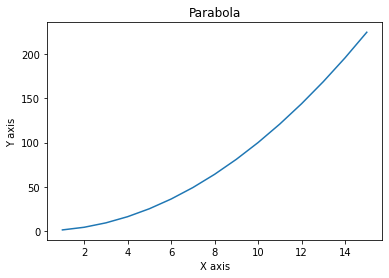

In [30]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
y = [1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225]

fig, ax = plt.subplots()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Parabola')
ax.plot(x, y)

## Customize your plots

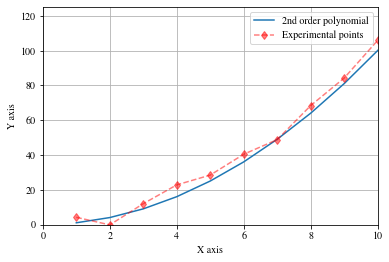

In [31]:
# Use LaTeX fonts:
plt.style.use({'font.family': 'STIXGeneral',
               'font.serif': 'Computer Modern',
               'font.sans-serif': 'Computer Modern Sans serif',})

y_noisy = np.random.normal(y, 5) # create some noisy data to simulate the experimental points

# create a new plot
fig2, ax2 = plt.subplots()
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.plot(x,y, label='2nd order polynomial')
ax2.plot(x,y_noisy,'rd--', label='Experimental points', alpha=0.5)
ax2.grid()
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 125])
ax2.legend()
fig2.savefig('figure.png')

## Creating an animation
Generating the parabola step by step

In [32]:
import os

temp_folder = 'gif_temp'
if not os.path.exists(temp_folder):
    os.mkdir(temp_folder)

Image 0 saved
Image 1 saved
Image 2 saved
Image 3 saved
Image 4 saved
Image 5 saved
Image 6 saved
Image 7 saved
Image 8 saved
Image 9 saved
Image 10 saved
Image 11 saved
Image 12 saved
Image 13 saved
Image 14 saved


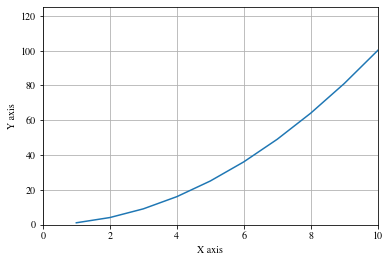

In [33]:
figAnim, axanim = plt.subplots()

# set plot properties that do not change.
axanim.set_xlabel('X axis')
axanim.set_ylabel('Y axis')
axanim.set_xlim([0, 10])
axanim.set_ylim([0, 125])
axanim.plot(x,y, label='2nd order polynomial')
axanim.grid()

for i,_ in enumerate(x):
    current_points = axanim.plot(x[:i],y_noisy[:i],'rd--', label='Experimental points', alpha=0.5)
    figAnim.savefig(f'{temp_folder}/Im_{str(i).zfill(2)}.png') # the use of zfill allows to recover them ordered
    print(f'Image {i} saved')
    # remove the current points for a clean plot
    points = current_points.pop(0)
    points.remove()


### Building the GIF

In [34]:
import imageio  # This is used to read the dumped images and create the animation
import shutil  # package to manage files

GIF_name = 'animated_parabola.gif'
cleanup = True # delete the temporary folder

images = []
for filename in os.listdir(temp_folder):
    images.append(imageio.imread(f'{temp_folder}/{filename}'))
    
imageio.mimsave(GIF_name, images, duration=0.2)

In [35]:
if cleanup:
    shutil.rmtree(temp_folder)

# Contents

## <font color='grey'> - Numpy </font>

## <font color='grey'> - Matplotlib </font>

## <font color='black'> - Scipy </font>


## Exercises 

- Read and plot data
- Random numbers and histograms

## Scipy
- Typical function and constants (scipy.pi, scipy.sin, etc)
- Integrators (ODE45 --> scipy.integrate.RK45, scipy.integrate.odeint)
- Curve fitting (scipy.optimize.curve_fit
- Interpolation (scipy.interpolate)
- Statistics (scipy.stats)

### Example: Solving an ODE with Scipy

y'(x) = y*ln(y)/x

y(2) = e

In [37]:
from scipy.integrate import odeint
import numpy as np

X0 = [2.0, np.e] # initial value

t = np.linspace(2, 10, 10) # solution points
# Function to integrate
df = lambda y, X: y*np.log(y)/X
# Scipy has a very powerful ODE integrator: - BUILD-IN FUNCTION
y_P = odeint(df, np.e, t)


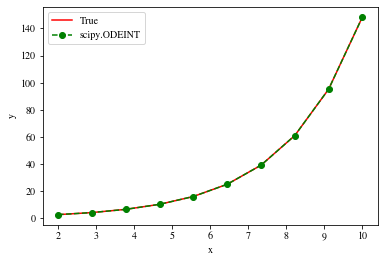

In [38]:
import matplotlib.pyplot as plt
plt.figure
plt.plot(t, np.e**(t/2), color='r', label='True')
plt.plot(t, y_P, color='g', linestyle= '--', label= 'scipy.ODEINT', marker='o' )
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Read data from a file

In [36]:
import numpy as np

file_to_read = 'alumina_data_raw.txt'
data = np.genfromtxt(file_to_read, skip_header=1, delimiter=';')

## Exercise: plot data
- From the previous dataset read column 0 (temperature) and column 3 (mass)
- Add appropriate labels

### Solution 

Text(0, 0.5, 'Mass, %')

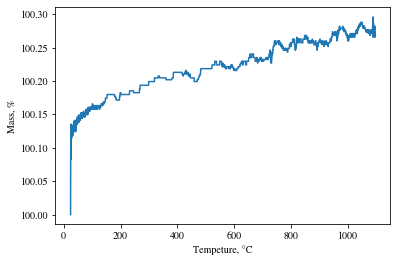

In [39]:
import matplotlib.pyplot as plt

temperature = data[:,0]
mass = data[:,3]

fig, ax = plt.subplots()

ax.plot(temperature, mass)
ax.set_xlabel('Tempeture, °C')
ax.set_ylabel('Mass, %')

## Exercise: gaussian histogram (part 1)
- Generate random data normally distributed
- Plot it in a histogram
- Include the theoretical normal distribution
- Add a legend
- Save the figure

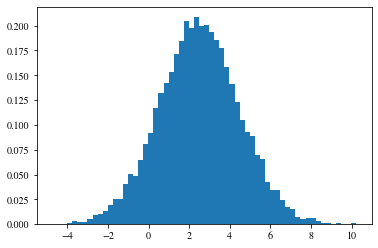

In [40]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt


mu = 2.5
sigma = 2

random_data = np.random.normal(mu,sigma,10000);

fig_hist, ax_hist = plt.subplots()
ax_hist.hist(random_data, density=True, bins=60, label='Data');

In [41]:
xmin = mu - 3*sigma
xmax = mu + 3*sigma

x = np.linspace(xmin, xmax, num=300)
y = 1/(sigma * (2*np.pi)**0.5)*np.e**(-0.5*((x-mu)/sigma)**2)
ax_hist.plot(x, y, label='Normal distr.')

In [42]:
ax_hist.legend()
fig_hist.savefig('Normal distribution.png')

## Exercise: gaussian histogram (part 2)
- Generate random data normally distributed with different number of sample points
- Compare the mean and the std of your dataset to the provided values
- Plot it in a histogram
- Plot the normal distribution with your parameters
- Include the theoretical normal distribution
- Plot the convergence curves for mean and std
- Add a legend(s)

(0.0, 0.06268777430836729)

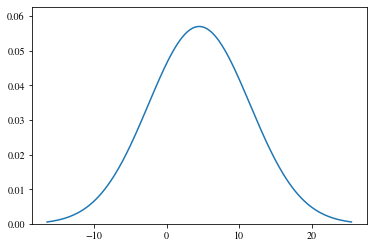

In [43]:
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import os

def compute_normal(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**0.5)*np.e**(-0.5*((x-mu)/sigma)**2)

# Set temp folder to save figures 
temp_folder = 'temp_histogram'
if not os.path.exists(temp_folder):
    os.mkdir(temp_folder)

## theoretical part
mu = 4.5
sigma = 7

xmin = mu - 3*sigma
xmax = mu + 3*sigma

x = np.linspace(xmin, xmax, num=300)
y_theoretical = compute_normal(x, mu, sigma)

fig_hist, ax_hist = plt.subplots()
ax_hist.plot(x, y_theoretical, label='Normal distr. Theoretical', color='C0')

# set the limits 
ax_hist.set_ylim(0,max(y_theoretical)*1.1)

In [44]:
## 

N_samples = np.geomspace(5, 20000, 100, dtype=int)

means = []
stds = []
for n in N_samples:
    random_data = np.random.normal(mu,sigma,n)

    mean = np.mean(random_data)
    std = np.std(random_data)

    means.append(mean)
    stds.append(std)
    
    
    count, bins, bars = ax_hist.hist(random_data, color='C1', density=True, bins=60, label='Data', alpha=0.7)

    y_computed = compute_normal(x, mean, std)
    current_curve = ax_hist.plot(x, y_computed, color='C2', label='Normal distr. Computed')
    
    # put the title 
    ax_hist.set_title(f'Samples: {n}, mean={mean:.2f}, std={std:.2f}')
    ax_hist.legend(loc='upper left')    
    
    
    # save the figure
    fig_hist.savefig(f'{temp_folder}/Im_{str(n).zfill(2)}.png')
    
    # remove the current points for a clean plot
    t = [b.remove() for b in bars]
    
    line = current_curve.pop(0)
    line.remove()

In [45]:
# We can animate the previous plot

import imageio  # This is used to read the dumped images and create the animation
import shutil  # package to manage files

GIF_name = 'histogram.gif'
cleanup = True # delete the temporary folder

images = []
for filename in os.listdir(temp_folder):
    images.append(imageio.imread(f'{temp_folder}/{filename}'))
    
imageio.mimsave(GIF_name, images, duration=0.2)

### Convergence of mean and std

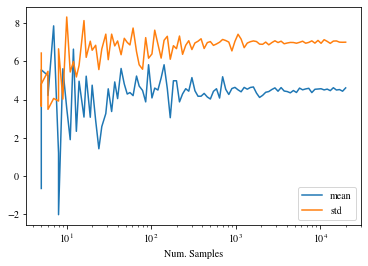

In [46]:
fig, ax = plt.subplots()

ax.plot(N_samples, means, label='mean')
ax.plot(N_samples, stds, label='std')

ax.set_xlabel('Num. Samples')

ax.legend()
ax.set_xscale('log')

fig.savefig('convergence.pdf')